#1. 테이블로 출력하기
##- 단순하게 확인가능
##- 하나하나 확인하는 방식에 한계가 존재함

#2. 그래프로 출력하기
##- 그림으로 확인하니 평가가 수월함
##- 직관적인 예측력 확인에 그치고, 객관적인 기준이 되지 못함

#3. 통계적인 방법으로 평가하기
##- RMSE(평균 제곱근 편차) : 실제값과 예측값 사이의 오차를 합산하는 개념
##- 오차가 더 클 때에 더 큰 패널티를 주고자 제곱의 차이 이용

#통계적 평가지표
##MAE(Mean Absolute Error) :
##- 평균 절대 오차
##- 실제값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산
##- 값이 작을수록 좋은 지표임(0에 가까울수록)

##MSE(Mean Squared Error) :
##- 평균 제곱 오차
##- 실제값과 예측값 사이의 오차를 제곱한 뒤 이에 대한 평균을 계산
##- 값이 작을수록 좋은 지표임(0에 가까울수록)

##RSME(Root Mean Squared Error) :
##- 루트 제곱 오차
##- MSE에 루트를 씌운 값으로 가장 일반적으로 사용됨
##- 값이 작을수록 좋은 지표임(0에 가까울수록)

##R^2 :
##- 결정 계수
##- 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표로 즉, 설명력을 나타냄
##- 값이 1에 가까울수록 좋은 지지표임

#예측모델 평가하기
## SSR(Sum of Squares Regression) : 종속변수 y의 평균값 대비 선형회귀 모델의 차이
## SST(Sum of Squares Total) : 종속변수 y의 평균값 대비 실제 값과의 차이
## R^2 = SSR / SST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
df = pd.read_csv('insurance.csv')
df.rename(columns={'expenses': 'charges'}, inplace=True)
df.drop(columns = ['region'], inplace=True)
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['sex'] == 'male', 'sex'] = 1
df.loc[df['sex'] == 'female', 'sex'] = 0
df['smoker'] = df['smoker'].astype(int)
df['sex'] = df['sex'].astype(int)
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [4]:
X = df[['age','sex','bmi','children','smoker']]
y = df['charges']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
pred = model.predict(X_test)
comparision = pd.DataFrame({'actual':y_test,'pred':pred})

<Axes: xlabel='actual', ylabel='pred'>

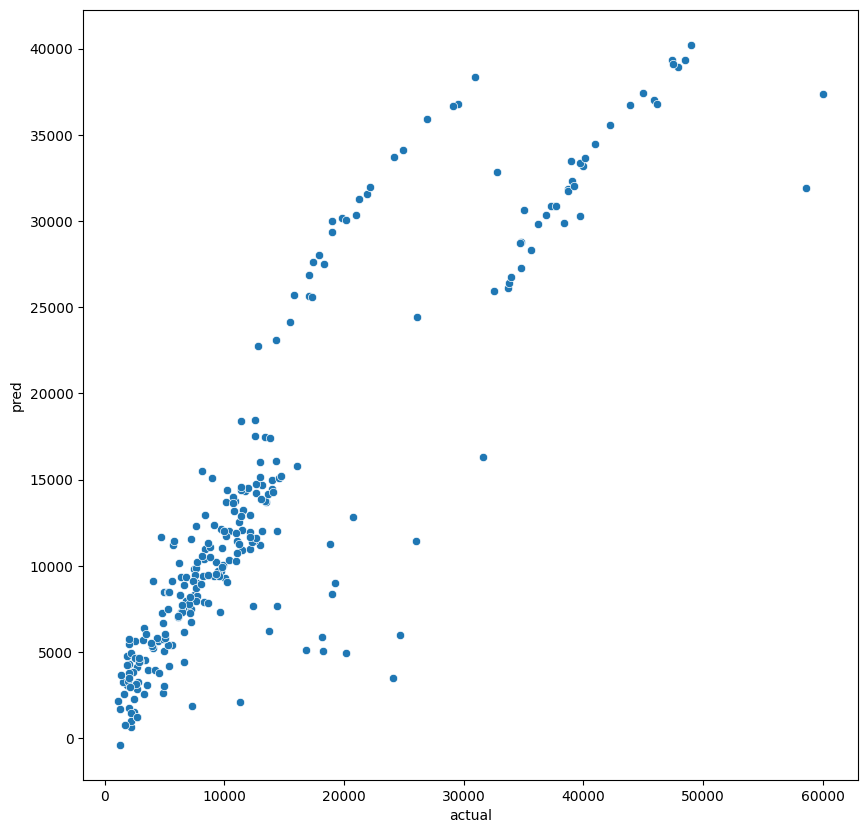

In [12]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'actual', y='pred',data = comparision)
#초반에는 y=x그래프를 따라간다..
#actual = 20000 ~ 30000일 때는 y=x그래프 위에 위치한다 == 실제값보다 예측값이 더 크게 예측했다
#actual > 30000일 때는 y=x보다 아래에 위치한다 == 더 비싼 보혐료를 내는 사람들을 선형 회귀 모델이 더 적은 돈을 내는 사람들로 예측했다

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred) ** 0.5
#**0.5 : 제곱근
#mean_squared_error(y_test,pred, squared = False)
#버전이 달라서 그런지 오류가 뜬다

5685.00557666715

In [11]:
mean_squared_error(y_test, pred)

32319288.4067366

In [12]:
model.score(X_train, y_train)

0.7368436854728319

#선형 모델(Linear Regression)
##- 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을그려서 예측하는 방법
##- 같은 키라도 사람마다 체중은 천차만별이지만, 평균적으로 보면 키가 크면 큰 만큼 평균 체중 또한 더 많이 나갈 것임
##- 머신러닝에서는 손실 함수(Loss Function)를 최소화하는 선을 찾아서 모델을 만들어 냄

#손실 함수
##- 예측값과 실제값의 차이, 즉 오차를 평가하는 방법
##- 그래프에서는 선과 각 점 간의 거리가 오차가 되고, 우리가 앞서 배웠던 MSE나 RMSE 등이 손실 함수가 됨
##- 예측한 선의 기울기나 y절편에 따라서 실제값과 예측값의 차이가 달라짐
##- 머신러닝은 이 손실 함수를 최소화하는 방향으로 최적의 선을 단시간에 찾아냄

In [13]:
model.coef_
#각 칼럼(변수)의 coefficient : 선형회귀 모델의 기울기

array([2.64785115e+02, 1.71863404e+01, 2.97653338e+02, 4.69405312e+02,
       2.34681241e+04])

In [15]:
pd.Series(model.coef_, index = X.columns)
#age가 1 증가시 보험료가 264만큼 증가
#childern(자녀수)가 1 증가하면 보험료 469만큼 증가..
#남자(sex == 1)가 여자(sex == 0)보다 보험료 17만큼 높다

,0
age,264.785115
sex,17.186340
bmi,297.653338
children,469.405312
smoker,23468.124130


In [17]:
model.intercept_
#선형 회귀 모델의 y절편

np.float64(-11581.182049431889)

#1단계 : 문제 정의
##- 성별, 나이 등의 정보를 활용하여 보험 청구비용을 예측함
#2단계 : 라이브러리 및 데이터 불러오기
##- 판다스와 프로젝트에 쓸 예제 데이터를 불러옴
#3단계 : 데이터 확인하기
##- 데이터를 확인하는 다양한 방법을 확인함
##- 결측치 등 특이사항은 없음
#4단계 : 전처리 : 학습셋과 실험셋 나누기
##- 지도 학습이므로 평가에 사용할 데이터를 학습셋과 시험셋으로 나누었음
#5단계 : 데이터 모델링
##- 선형 회귀 모델을 사용하여 예측모델을 만들었음
#6단계 : 모델을 활용해 예측하기
##- 시험셋에 대한 예측값을 얻었음
#7단계 : 예측모델 평가하기
##- 산점도와 테이블을 사용해 직관적으로 결과를 살펴보고 RSME와 R^2값도 알아보았음